# SciPy

Zawiera m.in.:\
    całkowani,e\
    równania różniczkowe,\
    statystykę,\
    interpolację,\
    optymalizację,\
    przetwarzanie sygnałów

In [1]:
!pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -------------------- ------------------- 19.9/38.5 MB 114.3 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 135.3 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 84.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize, stats, spatial, fft, signal, linalg, ndimage, interpolate

## Całkowanie i różniczkowanie

In [3]:
res, err = integrate.quad(lambda x: x ** 2, 0, 2)  # lambda zawsze zwraca wynik, funkcja anonimowa
print("Wynik całkowania  x^2 dx:", res, "Bład:", err)

Wynik całkowania  x^2 dx: 2.666666666666667 Bład: 2.960594732333751e-14


## Optymalizacja

In [5]:
res = optimize.minimize(lambda x: (x - 3) ** 2, x0=0)
print("Minimum funkcji kwadratowej: f(x) = (x-3)^2", res)

Minimum funkcji kwadratowej: f(x) = (x-3)^2   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5388963550532293e-16
        x: [ 3.000e+00]
      nit: 2
      jac: [-1.697e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


In [6]:
res.x

array([2.99999998])

## Statystyka

In [7]:
# Test Shapiro-Wilka
data = stats.norm.rvs(size=5000)
stat, p = stats.shapiro(data)
print("Shapiro-Wilk:", stat, "p-value:", p)  # p > 0.05 rozkład normalny

Shapiro-Wilk: 0.9994510071902564 p-value: 0.14871828082712452


In [8]:
## Odległośćc Euklidesowa

In [9]:
from scipy.spatial.distance import euclidean

print("Odległość:", euclidean([1, 1, ], [4, 6]))

Odległość: 5.830951894845301


In [10]:
print(type(euclidean([1, 1, ], [4, 6])))

<class 'numpy.float64'>


## Transformata Fouriera

In [11]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
yf = fft.fft(y)
print("FFT - pierwsze 5 wartości:", yf[:5])

FFT - pierwsze 5 wartości: [ 2.77555756e-16 -0.j          1.56237833e+00-49.71568464j
 -4.25850363e-02 +0.67686977j -3.57787605e-02 +0.37849975j
 -3.38833476e-02 +0.26821431j]


## Filtrowanie i przetwarzanie sygnałów

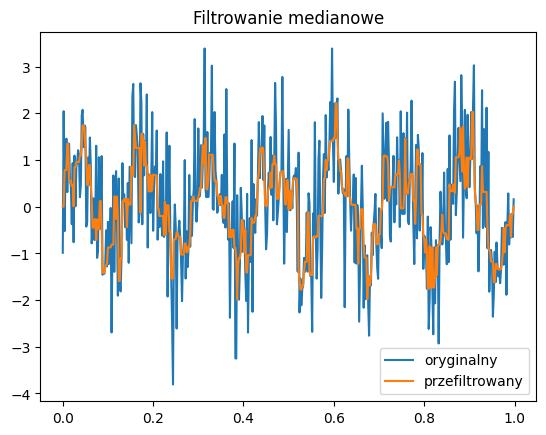

In [12]:
t = np.linspace(0, 1, 500, endpoint=False)
sig = np.sin(2 * np.pi * 7 * t) + np.random.normal(size=500)

filtered = signal.medfilt(sig, kernel_size=5)

plt.plot(t, sig, label="oryginalny")
plt.plot(t, filtered, label="przefiltrowany")
plt.legend()
plt.title("Filtrowanie medianowe")
plt.show()